## 오토인코더

### 인코더와 디코더, 잠재변수
- 오토인코더는 입력과 출력이 동일
    - 자기 자신을 재생성하는 네트워크
- Latent Vector : 잠재변수, Encoder : 입력쪽, Decoder : 출력쪽
- 인코더는 일종의 특징추출기와 같은 역할
- 디코더는 압축된 데이터를 다시 복원하는 역할

In [4]:
import tensorflow as tf
import numpy as np

In [5]:
(train_X, train_Y), (test_X, test_Y) = tf.keras.datasets.mnist.load_data()
print(train_X.shape, train_Y.shape)

train_X = train_X / 255.0
test_X = test_X / 255.0

(60000, 28, 28) (60000,)


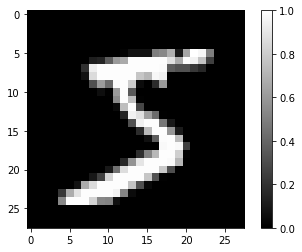

5


In [6]:
import matplotlib.pyplot as plt
plt.imshow(train_X[0].reshape(28, 28), cmap='gray')
plt.colorbar()
plt.show()

print(train_Y[0])

### 인코더, 디코더, 잠재변수

In [7]:
train_X = train_X.reshape(-1, 28 * 28)
test_X = test_X.reshape(-1, 28 * 28)
print(train_X.shape, train_Y.shape)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(784, activation='relu', input_shape=(784,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(784, activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

(60000, 784) (60000,)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 784)               615440    
                                                                 
 dense_6 (Dense)             (None, 64)                50240     
                                                                 
 dense_7 (Dense)             (None, 784)               50960     
                                                                 
Total params: 716,640
Trainable params: 716,640
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(train_X, train_X, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0489
Epoch 2/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0164
Epoch 3/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0114
Epoch 4/10
235/235 [==============================] - 2s 8ms/step - loss: 0.0094
Epoch 5/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0081
Epoch 6/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0073
Epoch 7/10
235/235 [==============================] - 2s 7ms/step - loss: 0.0068
Epoch 8/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0064
Epoch 9/10
235/235 [==============================] - 3s 12ms/step - loss: 0.0061
Epoch 10/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0058


### 자기 자신을 예측

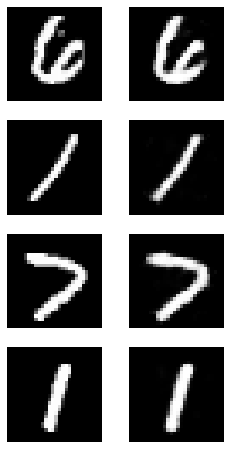

313/313 [==============================] - 1s 2ms/step - loss: 0.0055


0.0055321091786026955

In [10]:
import random

plt.figure(figsize=(4, 8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

### CNN

In [12]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='relu'),
    tf.keras.layers.Dense(7*7*64, activation='relu'),
    tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='relu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 14, 14, 32)        160       
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense_8 (Dense)             (None, 64)                401472    
                                                                 
 dense_9 (Dense)             (None, 3136)              203840    
                                                                 
 reshape (Reshape)           (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 14, 14, 32)       8224      
 nspose)                                                         
                                                      

In [13]:
model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 9s 36ms/step - loss: 0.0848
Epoch 2/20
235/235 [==============================] - 9s 37ms/step - loss: 0.0367
Epoch 3/20
235/235 [==============================] - 10s 41ms/step - loss: 0.0266
Epoch 4/20
235/235 [==============================] - 11s 49ms/step - loss: 0.0237
Epoch 5/20
235/235 [==============================] - 12s 51ms/step - loss: 0.0222
Epoch 6/20
235/235 [==============================] - 13s 53ms/step - loss: 0.0213
Epoch 7/20
235/235 [==============================] - 13s 55ms/step - loss: 0.0206
Epoch 8/20
235/235 [==============================] - 13s 54ms/step - loss: 0.0201
Epoch 9/20
235/235 [==============================] - 13s 54ms/step - loss: 0.0197
Epoch 10/20
235/235 [==============================] - 14s 59ms/step - loss: 0.0186
Epoch 11/20
235/235 [==============================] - 14s 58ms/step - loss: 0.0180
Epoch 12/20
235/235 [==============================] - 14s 62ms/step - loss: 0.0171
Epo

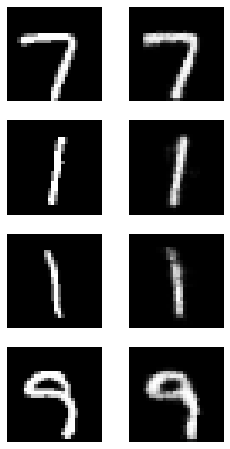

313/313 [==============================] - 1s 3ms/step - loss: 0.0152


0.015161244198679924

In [14]:
import random

plt.figure(figsize=(4, 8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

### relu -> elu

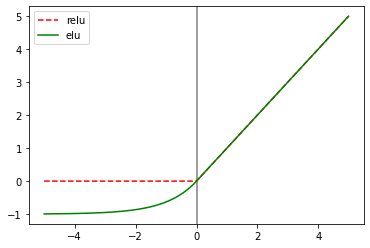

In [17]:
import math

x = np.arange(-5, 5, 0.01)
relu = [0 if z < 0 else z for z in x]
elu = [1.0 * (np.exp(z) - 1) if z < 0 else z for z in x]

plt.axvline(0, color='gray')
plt.plot(x, relu, 'r--', label='relu')
plt.plot(x, elu, 'g-', label='elu')
plt.legend()
plt.show()

In [7]:
train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=32, kernel_size=2, strides=(2,2), activation='elu', input_shape=(28, 28, 1)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64,activation='elu'),
    tf.keras.layers.Dense(7*7*64, activation='elu'),
    tf.keras.layers.Reshape(target_shape=(7, 7, 64)),
    tf.keras.layers.Conv2DTranspose(filters=32, kernel_size=2, strides=(2,2), padding='same', activation='elu'),
    tf.keras.layers.Conv2DTranspose(filters=1, kernel_size=2, strides=(2,2), padding='same', activation='sigmoid')
])

model.compile(optimizer=tf.optimizers.Adam(), loss='mse')

model.fit(train_X, train_X, epochs=20, batch_size=256)

Epoch 1/20
235/235 [==============================] - 10s 38ms/step - loss: 0.0550
Epoch 2/20
235/235 [==============================] - 10s 42ms/step - loss: 0.0173
Epoch 3/20
235/235 [==============================] - 10s 44ms/step - loss: 0.0115
Epoch 4/20
235/235 [==============================] - 11s 47ms/step - loss: 0.0100
Epoch 5/20
235/235 [==============================] - 12s 52ms/step - loss: 0.0090
Epoch 6/20
235/235 [==============================] - 11s 46ms/step - loss: 0.0082
Epoch 7/20
235/235 [==============================] - 10s 44ms/step - loss: 0.0074
Epoch 8/20
235/235 [==============================] - 11s 45ms/step - loss: 0.0070
Epoch 9/20
235/235 [==============================] - 11s 49ms/step - loss: 0.0066
Epoch 10/20
235/235 [==============================] - 12s 50ms/step - loss: 0.0063
Epoch 11/20
235/235 [==============================] - 18s 76ms/step - loss: 0.0061
Epoch 12/20
235/235 [==============================] - 22s 92ms/step - loss: 0.0059
E

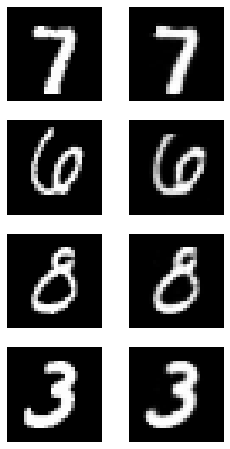

313/313 [==============================] - 2s 5ms/step - loss: 0.0051


0.005118114408105612

In [8]:
import random

plt.figure(figsize=(4, 8))
for c in range(4):
    plt.subplot(4, 2, c*2+1)
    rand_index = random.randint(0, test_X.shape[0])
    plt.imshow(test_X[rand_index].reshape(28, 28), cmap='gray')
    plt.axis('off')

    plt.subplot(4, 2, c*2+2)
    img = model.predict(np.expand_dims(test_X[rand_index], axis=0))
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.axis('off')

plt.show()

model.evaluate(test_X, test_X)

### 잠재변수 벡터 확보

In [9]:
latent_vector_model = tf.keras.Model(inputs=model.input, outputs=model.layers[3].output)
latent_vector = latent_vector_model.predict(train_X)
print(latent_vector.shape)
print(latent_vector[0])

(60000, 3136)
[ 5.6866956   3.876518   -0.99947745 ... -0.99561596  6.5459847
  8.210864  ]


### 군집

In [10]:
%%time
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, n_init=10, random_state=42)
kmeans.fit(latent_vector)

Wall time: 5min 13s


KMeans(n_clusters=10, random_state=42)

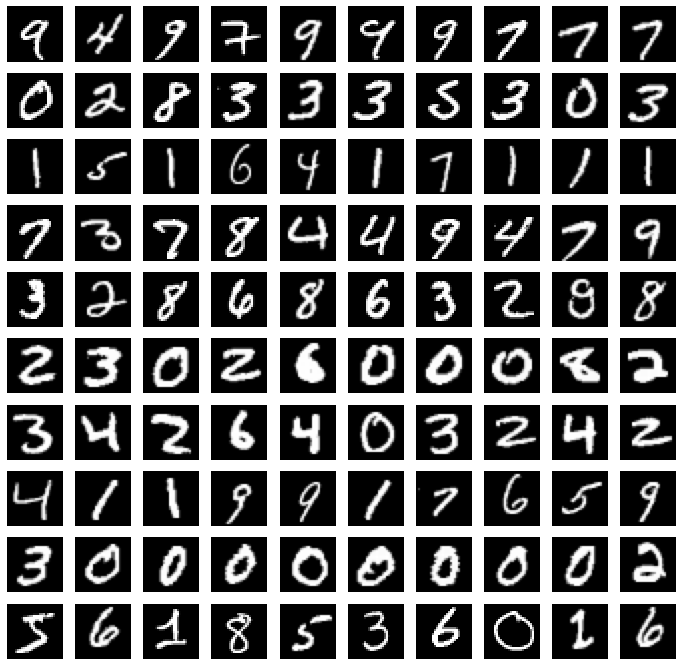

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
for i in range(10):
    images = train_X[kmeans.labels_ == i]
    for c in range(10):
        plt.subplot(10, 10, i*10+c+1)
        plt.imshow(images[c].reshape(28, 28), cmap='gray')
        plt.axis('off')
plt.show()

### t-SNE
- 고차원의 벡터를 저차원으로 옮겨서 시각화에 도움을 주는 방법
- t Stochastic Nearest Neighbor
- k-Means가 각 클러스터를 계산하기 위한 단위로 중심과 각 데이터의 거리를 측정한다면
- t-SNE는 각 데이터의 유사도를 정의하고 원래 공간에서의 유사도와 저차원 공간에서의 유사도가 비슷해지도록 학습시킴
- 여기서 유사도가 수학적으로 확률로 표현됨

C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


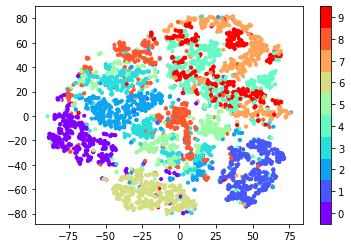

Wall time: 25.4 s


In [12]:
%%time
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

cmap = plt.get_cmap('rainbow', 10)
fig = plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap=cmap)
cb = plt.colorbar(fig, ticks=range(10))
n_clusters = 10
tick_locs = (np.arange(n_clusters) + 0.5) * (n_clusters-1)/n_clusters
cb.set_ticks(tick_locs)
cb.set_ticklabels(range(10))

plt.show()

### k-nn의 숫자 perplexities 튜닝

C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  

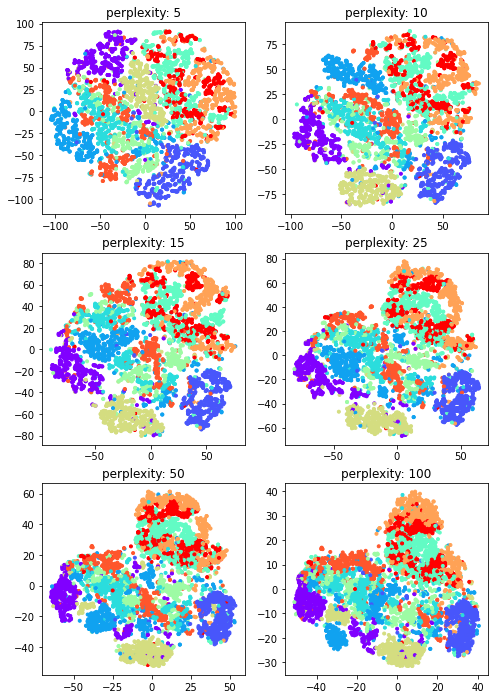

Wall time: 2min 57s


In [13]:
%%time

perplexities = [5, 10, 15, 25, 50, 100]
plt.figure(figsize=(8, 12))

for c in range(6):
    tsne = TSNE(n_components=2, learning_rate=100, perplexity=perplexities[c], random_state=0)
    tsne_vector = tsne.fit_transform(latent_vector[:5000])

    plt.subplot(3, 2, c+1)
    plt.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap='rainbow')
    plt.title('perplexity: {0}'.format(perplexities[c]))

plt.show()

C:\Users\seonwook\miniconda3\envs\ds_study\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


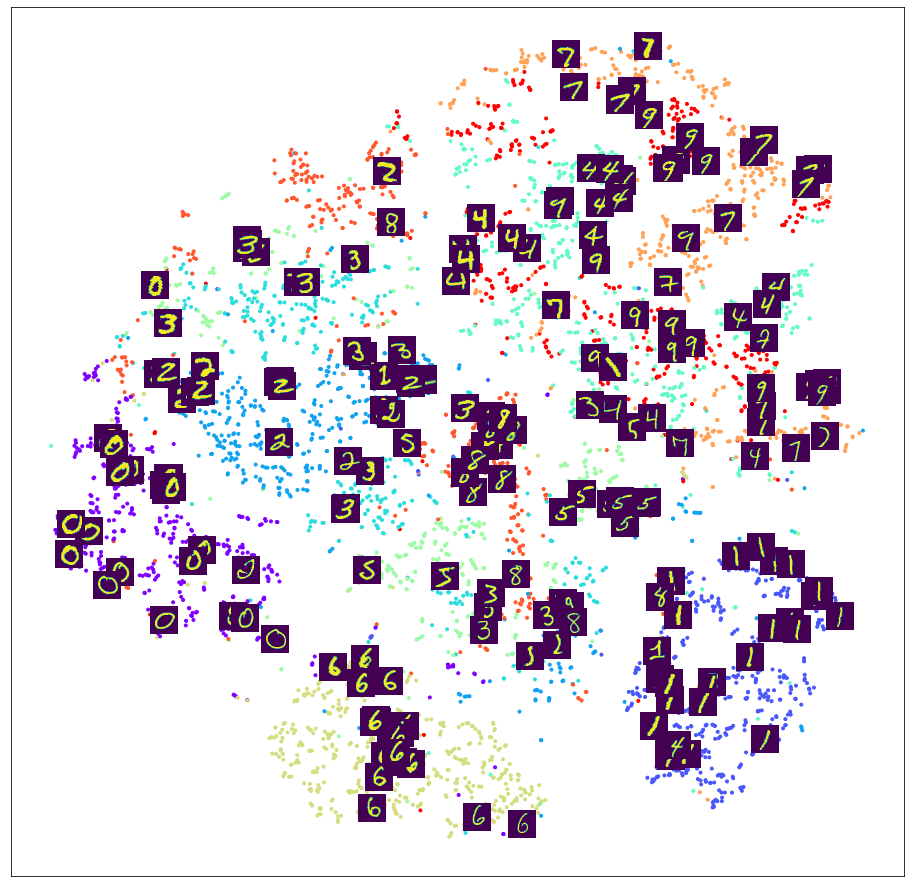

In [14]:

from matplotlib.offsetbox import TextArea, DrawingArea, OffsetImage, AnnotationBbox

plt.figure(figsize=(16, 16))

tsne = TSNE(n_components=2, learning_rate=100, perplexity=15, random_state=0)
tsne_vector = tsne.fit_transform(latent_vector[:5000])

ax = plt.subplot(1, 1, 1)
ax.scatter(tsne_vector[:,0], tsne_vector[:,1], marker='.', c=train_Y[:5000], cmap='rainbow')
for i in range(200):
    imagebox = OffsetImage(train_X[i].reshape(28, 28))
    ab = AnnotationBbox(imagebox, (tsne_vector[i,0], tsne_vector[i,1]), frameon=False, pad=0.0)
    ax.add_artist(ab)

ax.set_xticks([])
ax.set_yticks([])
plt.show()